@author: Nguyen Trong Dai

@date: 20/05/2022

@file: vietnamese_food.ipynb


In [12]:
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
import pickle

import cv2 as cv
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [24]:
def saveData(rawFolder):
    kichThuocAnh = (128, 128)
    print("Bắt đầu xử lí...")
    images = []
    labels = []
    i = 0
    for folder in listdir(rawFolder):
        print("Folder=",folder)
        for file in listdir(rawFolder  + folder):
            print("File=", file)
            img = cv.imread(rawFolder  + folder +"/" + file)
            images.append(cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB),dsize=(128,128)))
            labels.append(i)
        i+=1
    images = np.array(images)
    labels = np.array(labels) #.reshape(-1,1)
    # encoder = LabelBinarizer()
    # labels = encoder.fit_transform(labels)
    print(labels)

    file = open('./dataset/vnFoodDataset.data', 'wb')
    pickle.dump((images,labels), file)
    file.close()
    return 

In [25]:
def loadData():
    file = open('./dataset/vnFoodDataset.data', 'rb')
    (images, labels) = pickle.load(file)
    # close the file
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [26]:
saveData("./dataset/")

Bắt đầu xử lí...
Folder= banh_bot_loc
File= banh-bot-loc-01.jpg
File= banh-bot-loc-02.jpg
File= banh-bot-loc-03.jpg
File= banh-bot-loc-04.jpg
File= banh-bot-loc-05.jpg
File= banh-bot-loc-06.jpg
File= banh-bot-loc-07.jpg
File= banh-bot-loc-08.jpg
File= banh-bot-loc-09.jpg
File= banh-bot-loc-10.jpg
File= banh-bot-loc-11.jpg
File= banh-bot-loc-12.jpg
File= banh-bot-loc-13.jpg
File= banh-bot-loc-14.jpg
File= banh-bot-loc-15.jpg
File= banh-bot-loc-16.jpg
File= banh-bot-loc-17.jpg
File= banh-bot-loc-18.jpg
File= banh-bot-loc-19.jpg
File= banh-bot-loc-20.jpg
File= banh-bot-loc-21.jpg
File= banh-bot-loc-22.jpg
File= banh-bot-loc-23.jpg
File= banh-bot-loc-24.jpg
File= banh-bot-loc-25.jpg
File= banh-bot-loc-26.jpg
File= banh-bot-loc-27.jpg
File= banh-bot-loc-28.jpg
File= banh-bot-loc-29.jpg
File= banh-bot-loc-30.jpg
Folder= banh_gio
File= banh-gio-01.jpg
File= banh-gio-02.jpg
File= banh-gio-03.jpg
File= banh-gio-04.jpg
File= banh-gio-05.jpg
File= banh-gio-06.jpg
File= banh-gio-07.jpg
File= banh-

In [30]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(120, 128, 128, 3)
(120,)


In [31]:
labels = ['Bánh bột lọc', 'Bánh giò', 'Bánh trôi nước', 'Bánh trung thu']
print(f"KÍCH THƯỚC DỮ LIỆU TRAIN {X_train.shape} - LABEL: {y_train.shape}")

KÍCH THƯỚC DỮ LIỆU TRAIN (96, 128, 128, 3) - LABEL: (96,)


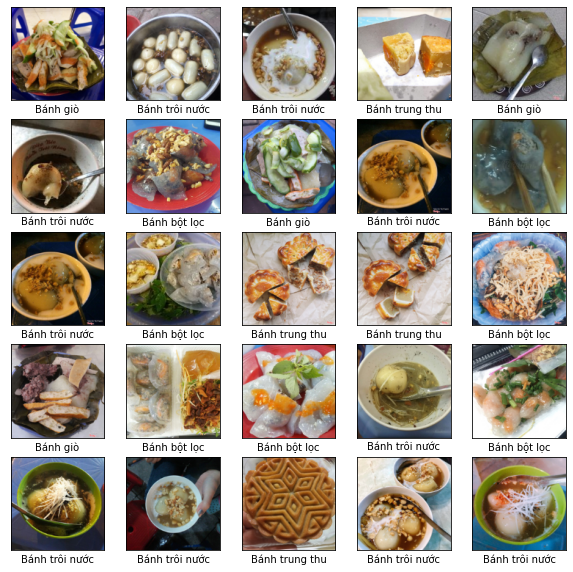

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(labels[y_train[i]])
plt.show()

In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [35]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(128,128,3)))
model.add(layers.Conv2D(24, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))

model.add(layers.Conv2D(24, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4))
model.add(layers.Softmax())

In [47]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer="adam", 
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)
model.save("model.h5")

Epoch 1/10
3/3 [==============================] - 1s 297ms/step - loss: 13.1467 - accuracy: 0.2812 - val_loss: 16.6255 - val_accuracy: 0.2917
Epoch 2/10
3/3 [==============================] - 1s 218ms/step - loss: 10.0645 - accuracy: 0.2396 - val_loss: 3.7683 - val_accuracy: 0.2500
Epoch 3/10
3/3 [==============================] - 1s 214ms/step - loss: 3.3631 - accuracy: 0.2708 - val_loss: 3.1288 - val_accuracy: 0.1667
Epoch 4/10
3/3 [==============================] - 1s 211ms/step - loss: 2.3185 - accuracy: 0.2917 - val_loss: 2.0005 - val_accuracy: 0.1250
Epoch 5/10
3/3 [==============================] - 1s 269ms/step - loss: 1.5068 - accuracy: 0.3854 - val_loss: 1.3815 - val_accuracy: 0.2083
Epoch 6/10
3/3 [==============================] - 1s 250ms/step - loss: 1.2561 - accuracy: 0.5312 - val_loss: 1.3036 - val_accuracy: 0.3333
Epoch 7/10
3/3 [==============================] - 1s 204ms/step - loss: 1.2094 - accuracy: 0.4896 - val_loss: 1.3032 - val_accuracy: 0.2500
Epoch 8/10
3/3 [=